## 1.0 Import Function

In [1]:
from META_TOOLBOX import *
import VIGA_VERIFICA as VIGA_VER

## 2.0 Setup 

In [2]:
N_REP = 4
N_ITER = 150
X_L = [0.20, 0.10, 0.10, 1/6.0]
X_U = [0.30, 0.15, 0.15, 1/3.5]
D = 4
M = 2
GAMMA = GAMMA_ASSEMBLY(X_L, X_U, D, M)
SETUP_FA = {
         'N_REP': N_REP,
         'N_ITER': N_ITER,
         'N_POP': 10,
         'D': D,
         'X_L': X_L,
         'X_U': X_U,
         'BETA_0': 0.98,
         'ALPHA_MIN': 0.25,
         'ALPHA_MAX': 1.00,
         'THETA': 0.95,
         'GAMMA': GAMMA,
         'NULL_DIC': None
        }

In [3]:
# OBJ. Function
def OF_FUNCTION(X, NULL_DIC):
    # Geometria da viga
    VIGA = {
            'H_W': X[0],
            'B_W': X[1],
            'B_FS': 0.30,
            'B_FI': 0.30,
            'H_FS': X[2],
            'H_FI': X[2],
            'H_SI': 0.07,
            'H_II': 0.07,
            'COB': 0.035,
            'PHI_L': 12.5 / 1E3,
            'PHI_E': 10.0 / 1E3,
            'L': 20,
            'L_PISTA': 150,
            'FATOR_SEC': 'I',
            'DELTA_ANC': 6 / 1E3,
            'TEMPO_CONC': [2.00, 3.00, 28.0, 35.0, 45, 50 * 365],
            'TEMPO_ACO': [3.00, 4.00, 29.0, 36.0, 46, 51 * 365],
            'TEMP': 30,
            'U': 40,
            'PERDA_INICIAL': 8.00,
            'PERDA_TEMPO': 17.00,
            'E_SCP': 200E6,
            'PHO_S': 78,
            'F_PK': 1864210.526,
            'F_YK': 1676573.427,
            'LAMBA_SIG': 1,
            'TIPO_FIO_CORD_BAR': 'COR',
            'TIPO_PROT': 'PRE',
            'TIPO_ACO': 'RB',
            'PHO_C': 25,
            'F_CK': 50 * 1E3,
            'CIMENTO': 'CP5',
            'AGREGADO': 'GRA',
            'ABAT': 0.09,
            'G_2K': 1.55 + 0.70,
            'Q_1K': 1.5,
            'PSI_1': 0.40,
            'PSI_2': 0.30,
            'GAMMA_F1': 1.30,
            'GAMMA_F2': 1.40,
            'GAMMA_S':1.15,
            'ETA_1':1.2,
            'ETA_2':1.0,
            'E_PPROPORCAO': X[3]
            }
    G, A_C, A_SCP = VIGA_VER.VERIFICACAO_VIGA(VIGA)
    PESO = VIGA['L'] * A_C *  VIGA['PHO_C']
    OF = PESO
    for I_CONT in range(len(G)):
        OF += (max(0, G[I_CONT]) ** 2) * 1E10
    return OF

## 4.0 Example

In [4]:
[RESULTS_REP, BEST_REP, AVERAGE_REP, WORST_REP, STATUS] = FA_ALGORITHM_0001(OF_FUNCTION, SETUP_FA)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Process Time: 28.37 Seconds 
 Seconds per repetition: 7.09


In [5]:
BEST_REP_ID = STATUS[0]
BEST_REP_ID

1

In [6]:
STATUS

array([1, 0, 2, 3], dtype=int64)

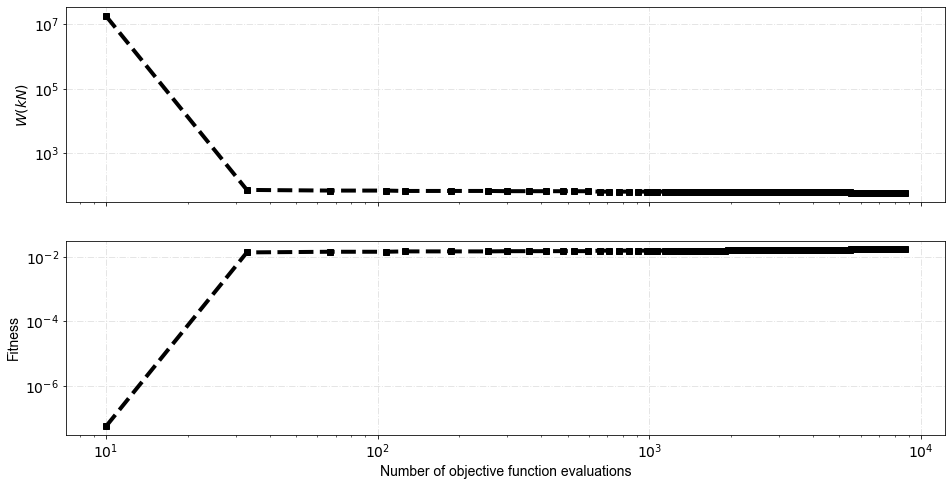

In [7]:
BEST = BEST_REP[BEST_REP_ID]
AVERAGE = AVERAGE_REP[BEST_REP_ID]
WORST = WORST_REP[BEST_REP_ID]
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR OF': '#000000',
              'MARKER OF': 's',
              'COLOR FIT': '#000000',
              'MARKER FIT': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'OF AXIS LABEL': '$W (kN) $',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'Y LOG': True,
              'X LOG': True,
             }
DATASET = {'X': BEST['NEOF'], 'OF': BEST['OF'], 'FIT': BEST['FIT']}
META_PLOT_001(DATASET, PLOT_SETUP)

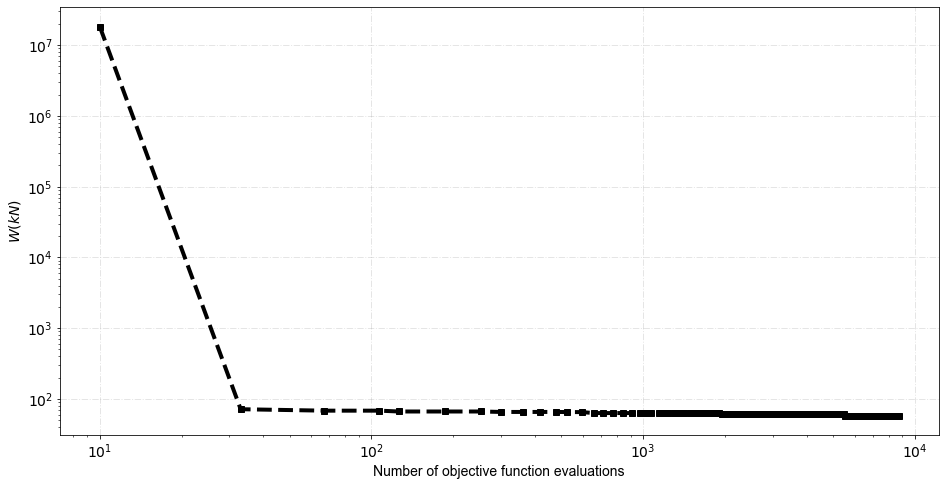

In [8]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR': '#000000',
              'MARKER': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'Y AXIS LABEL': '$W (kN) $',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'Y LOG': True,
              'X LOG': True,
             }
DATASET = {'X': BEST['NEOF'], 'Y': BEST['OF']}
META_PLOT_002(DATASET, PLOT_SETUP)

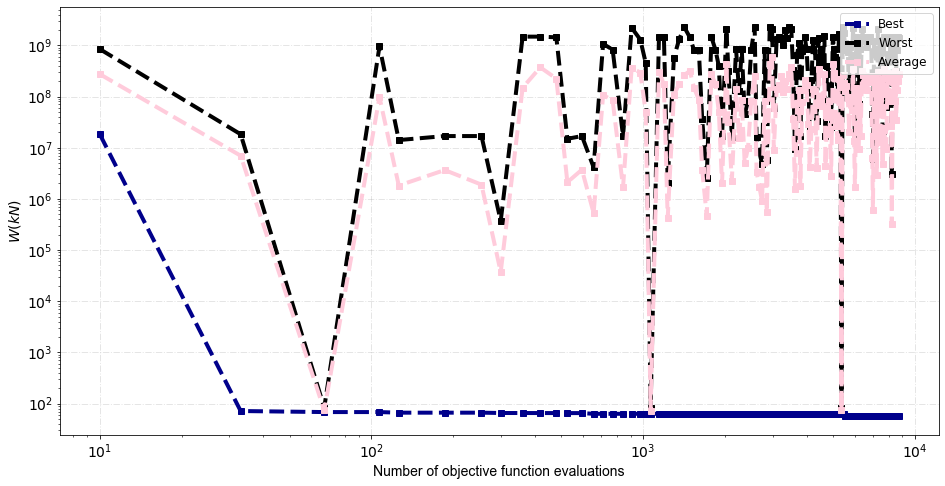

In [9]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR BEST': '#00008B',
              'COLOR WORST': '#000000',
              'COLOR AVERAGE': '#ffcbdb',
              'MARKER': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'Y AXIS LABEL': '$W (kN) $',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'LOC LEGEND': 'upper right',
              'SIZE LEGEND': 12,
              'Y LOG': True,
              'X LOG': True
             }
DATASET = {'X': BEST['NEOF'], 'BEST': BEST['OF'], 'AVERAGE': AVERAGE['OF'], 'WORST': WORST['OF']}
META_PLOT_003(DATASET, PLOT_SETUP)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


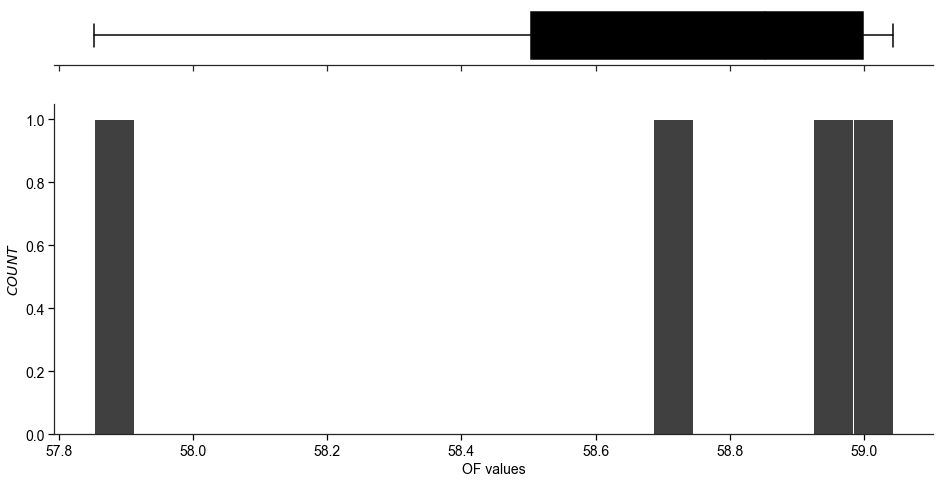

In [10]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'MARKER': 's',
              'X AXIS LABEL': 'OF values',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'COLOR': '#000000',
              'AXISES COLOR': '#000000',
              'BINS': 20,
              'KDE': False,
             }
DATASET = {'NUMBER OF REPETITIONS': N_REP, 'NUMBER OF ITERATIONS': N_ITER, 'OF OR FIT': 'OF', 'BEST': BEST_REP}
META_PLOT_004(DATASET, PLOT_SETUP)